In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --quiet vietocr
# !pip install opencv-python-headless

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.9/133.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 16.3 MB/s eta 0:00:00


In [ ]:
import cv2
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab.patches import cv2_imshow
from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Seup file config and Training model

In [ ]:
config = Cfg.load_config_from_name('vgg_seq2seq')

dataset_params = {
    'name':'vietnamese_data_seq2seq', # tên dataset do bạn tự đặt
    'data_root':'/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images', # thư mục chứa dữ liệu bao gồm ảnh và nhãn
    'train_annotation':'/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/label1.txt', # ảnh và nhãn tập train
    'valid_annotation':'/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/val2.txt' # ảnh và nhãn tập test
}

params = {
         'print_every':1, # hiển thị loss mỗi 200 iteration
         'valid_every':5, # đánh giá độ chính xác mô hình mỗi 10000 iteraction
          'iters':20, # Huấn luyện 20000 lần
          'export':'demo.pth', # lưu model được huấn luyện tại này
          'metrics': 10 # sử dụng 10000 ảnh của tập test để đánh giá mô hình
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config["dataloader"]["num_workers"] = 2
config['device'] = 'cpu' # device để huấn luyện mô hình, để sử dụng cpu huấn luyện thì thay bằng 'cpu'
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cpu',
 'seq_modeling': 'seq2seq',
 'transformer': {'encoder_hidden': 256,
  'decoder_hidden': 256,
  'img_channel': 256,
  'decoder_embedded': 256,
  'dropout': 0.1},
 'optimizer': {'max_lr': 0.001, 'pct_start': 0.1},
 'trainer': {'batch_size': 32,
  'print_every': 1,
  'valid_every': 5,
  'iters': 20,
  'export': 'demo.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10},
 'dataset': {'name': 'vietnamese_data_seq2seq',
  'data_root': '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images',
  'train_annotation': '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/label1.txt',
  'valid_annotation': '/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/val

In [ ]:
trainer = Trainer(config, pretrained = True)

Model weight /tmp/vgg_seq2seq.pth exsits. Ignore download!
train_vietnamese_data_seq2seq exists. Remove folder if you want to create new dataset


train_vietnamese_data_seq2seq build cluster: 100%|███████████| 1837/1837 [00:00<00:00, 47493.61it/s]

valid_vietnamese_data_seq2seq exists. Remove folder if you want to create new dataset



valid_vietnamese_data_seq2seq build cluster: 100%|███████████| 1837/1837 [00:00<00:00, 73584.28it/s]


In [ ]:

# sử dụng lệnh này để visualize tập train, bao gồm cả augmentation
# trainer.visualize_dataset()
trainer.train()
torch.save(trainer.model.state_dict(), 'demo.pth')

# huấn luyện xong thì nhớ lưu lại config để dùng cho Predictor
trainer.config.save('config.yml')

iter: 000002 - train loss: 1.709 - lr: 1.00e-03 - load time: 1.37 - gpu time: 83.69
iter: 000003 - train loss: 1.711 - lr: 9.92e-04 - load time: 0.02 - gpu time: 68.35
iter: 000004 - train loss: 1.391 - lr: 9.70e-04 - load time: 0.01 - gpu time: 63.89
iter: 000005 - train loss: 1.318 - lr: 9.33e-04 - load time: 0.01 - gpu time: 64.00
iter: 000005 - valid loss: 1.256 - acc full seq: 0.0000 - acc per char: 0.3574
iter: 000006 - train loss: 1.284 - lr: 8.83e-04 - load time: 0.01 - gpu time: 65.24
iter: 000007 - train loss: 1.232 - lr: 8.21e-04 - load time: 0.01 - gpu time: 58.67
iter: 000008 - train loss: 1.198 - lr: 7.50e-04 - load time: 0.01 - gpu time: 64.25
iter: 000009 - train loss: 1.140 - lr: 6.71e-04 - load time: 0.01 - gpu time: 57.30
iter: 000010 - train loss: 1.141 - lr: 5.87e-04 - load time: 0.01 - gpu time: 57.94
iter: 000010 - valid loss: 1.054 - acc full seq: 0.0000 - acc per char: 0.5096
iter: 000011 - train loss: 1.050 - lr: 5.00e-04 - load time: 0.00 - gpu time: 64.13
it

FileNotFoundError: [Errno 2] No such file or directory: ''

# Model pretrain

In [ ]:
config = Cfg.load_config_from_file('config.yml') # sử dụng config của các bạn được export lúc train nếu đã thay đổi tham số
config['weights'] = 'demo.pth' # đường dẫn đến trọng số đã huấn luyện hoặc comment để sử dụng pretrained model của mình
config['device'] = 'cpu' # device chạy 'cuda:0', 'cuda:1', 'cpu'
detector = Predictor(config)

/usr/local/lib/python3.10/dist-packages/vietocr/tool/predictor.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(weights, map_location=to

# Model vgg_seq2seq

In [ ]:
config1 = Cfg.load_config_from_name('vgg_seq2seq')
# config1['weights'] = 'vgg_seq2seq.pth'
config1['device'] = 'cpu'
detector1 = Predictor(config1)

10935it [00:07, 1549.11it/s]


# Testing

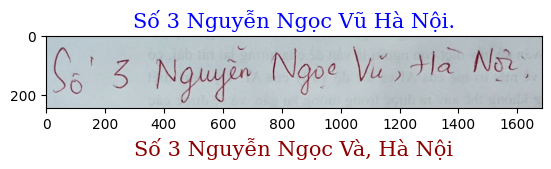

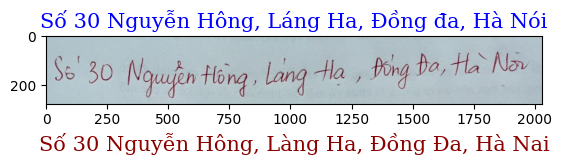

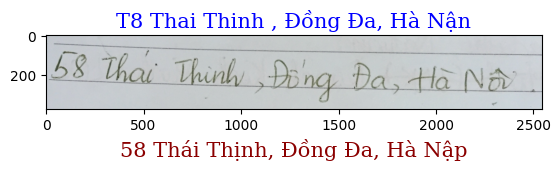

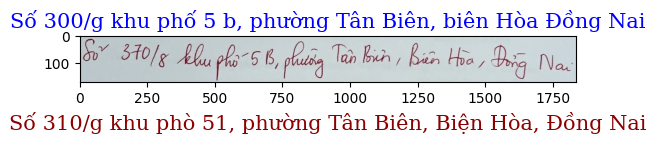

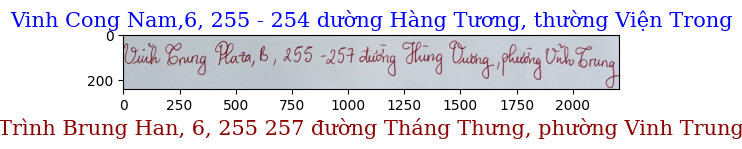

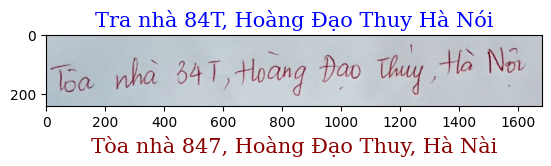

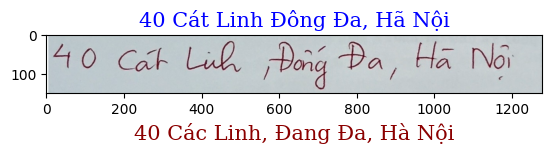

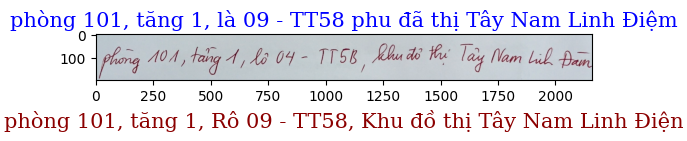

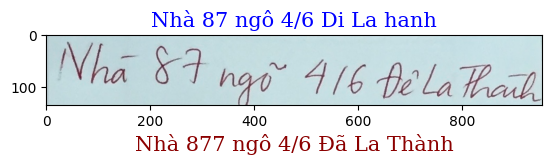

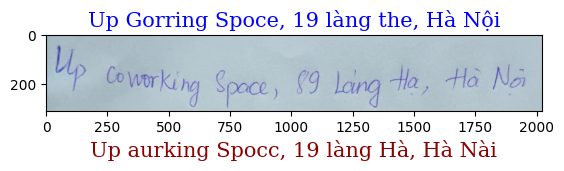

In [ ]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
path = "/content/drive/MyDrive/Colab Notebooks/vn_handwritten_images/label1.txt"
count = 0
with open(path, mode = 'r', encoding = 'UTF-8') as r:
    f = r.read()
    t = f.split("\n")
    for i in range(10):
      try:
          path, label = t[i].split("\t")
          show_img = cv2.imread(path) # Read image by OpenCV
          img = cv2.cvtColor(show_img, cv2.COLOR_BGR2RGB) # Convert image from BGR2RGB
          pil = Image.fromarray(img) # Convert datatype from numpy.ndarray to PIL image. Because vietOCR only take datatype input Image is PIL.
          font2 = {'family':'serif','color':'darkred','size':15}
          result = detector.predict(pil, return_prob = False)
          plt.title(label)
          plt.imshow(show_img)
          plt.xlabel(result, fontdict = font2)
          plt.show()
      except: pass
